In [ ]:
!pip install koreanize-matplotlib

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

In [ ]:
culture_2023 = pd.read_excel('/content/drive/MyDrive/파데분/문화예술.xlsx', header= 1)
culture_2023.head()

/usr/local/lib/python3.11/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,행정구역별(1),특성별(1),특성별(2),계 (%),관람함 (%),관람횟수(평균) (회),- 음악·연주회·콘서트 (%),· 관람 횟수(평균) (회),- 연극·마당극·뮤지컬 (%),· 관람 횟수(평균) (회).1,...,- 박물관 (%),· 관람 횟수(평균) (회).4,- 미술관 (%),· 관람 횟수(평균) (회).5,- 문학행사 (회),· 관람 횟수(평균) (%),- 스포츠 경기 (%),· 관람 횟수(평균) (회).6,- 기타 (%),· 관람 횟수(평균) (회).7
0,전국,전체,계,100,55.3,7.0,26.6,2.2,19.5,2.2,...,25.1,2.4,23.2,2.3,8.1,2.0,27.3,4.4,0.6,4.8
1,전국,성별,남자,100,54.4,7.0,21.1,2.1,14.4,2.0,...,22.0,2.4,17.1,2.2,6.4,2.1,37.3,4.7,0.6,6.1
2,전국,성별,여자,100,56.3,7.0,31.8,2.3,24.3,2.3,...,28.1,2.4,29.0,2.4,9.6,2.0,17.9,3.7,0.5,3.2
3,서울특별시,전체,계,100,62.2,7.7,27.7,2.2,25.8,2.7,...,27.8,2.7,28.1,2.5,7.7,1.9,25.9,4.4,0.2,4.5
4,서울특별시,성별,남자,100,60.0,7.5,22.1,1.9,17.8,2.6,...,24.6,2.5,19.0,2.3,5.8,2.0,35.9,5.0,0.2,6.4


In [ ]:
culture_2023 = culture_2023.rename(columns={'특성별(2)': '성별'})

In [ ]:
culture_2023.head()

,행정구역별(1),특성별(1),성별,계 (%),관람함 (%),관람횟수(평균) (회),- 음악·연주회·콘서트 (%),· 관람 횟수(평균) (회),- 연극·마당극·뮤지컬 (%),· 관람 횟수(평균) (회).1,...,- 박물관 (%),· 관람 횟수(평균) (회).4,- 미술관 (%),· 관람 횟수(평균) (회).5,- 문학행사 (회),· 관람 횟수(평균) (%),- 스포츠 경기 (%),· 관람 횟수(평균) (회).6,- 기타 (%),· 관람 횟수(평균) (회).7
0,전국,전체,계,100,55.3,7.0,26.6,2.2,19.5,2.2,...,25.1,2.4,23.2,2.3,8.1,2.0,27.3,4.4,0.6,4.8
1,전국,성별,남자,100,54.4,7.0,21.1,2.1,14.4,2.0,...,22.0,2.4,17.1,2.2,6.4,2.1,37.3,4.7,0.6,6.1
2,전국,성별,여자,100,56.3,7.0,31.8,2.3,24.3,2.3,...,28.1,2.4,29.0,2.4,9.6,2.0,17.9,3.7,0.5,3.2
3,서울특별시,전체,계,100,62.2,7.7,27.7,2.2,25.8,2.7,...,27.8,2.7,28.1,2.5,7.7,1.9,25.9,4.4,0.2,4.5
4,서울특별시,성별,남자,100,60.0,7.5,22.1,1.9,17.8,2.6,...,24.6,2.5,19.0,2.3,5.8,2.0,35.9,5.0,0.2,6.4


In [ ]:
culture_2023.columns = culture_2023.columns.str.replace(r'\([^)]*\)', '', regex=True) \
                        .str.replace('- ', '', regex=False) \
                        .str.replace('·', '/', regex=False) \
                        .str.replace('· ', '', regex=False) \
                        .str.replace('%', '', regex=False) \
                        .str.strip()

culture_2023.head()

,행정구역별,성별,음악/연주회/콘서트,연극/마당극/뮤지컬,무용,영화,박물관,미술관,문학행사,스포츠 경기,기타
0,전국,계,26.6,19.5,2.3,77.4,25.1,23.2,8.1,27.3,0.6
1,전국,남자,21.1,14.4,1.6,75.7,22.0,17.1,6.4,37.3,0.6
2,전국,여자,31.8,24.3,2.9,79.1,28.1,29.0,9.6,17.9,0.5
3,서울특별시,계,27.7,25.8,2.8,78.3,27.8,28.1,7.7,25.9,0.2
4,서울특별시,남자,22.1,17.8,1.5,76.4,24.6,19.0,5.8,35.9,0.2


In [ ]:
culture_2023=culture_2023[['행정구역별', '성별', '음악/연주회/콘서트', '연극/마당극/뮤지컬', '무용',
                           '영화', '박물관','미술관', '문학행사', '스포츠 경기', '기타']]

In [ ]:
culture_2023.head()

,행정구역별,성별,음악/연주회/콘서트,연극/마당극/뮤지컬,무용,영화,박물관,미술관,문학행사,스포츠 경기,기타
0,전국,계,26.6,19.5,2.3,77.4,25.1,23.2,8.1,27.3,0.6
1,전국,남자,21.1,14.4,1.6,75.7,22.0,17.1,6.4,37.3,0.6
2,전국,여자,31.8,24.3,2.9,79.1,28.1,29.0,9.6,17.9,0.5
3,서울특별시,계,27.7,25.8,2.8,78.3,27.8,28.1,7.7,25.9,0.2
4,서울특별시,남자,22.1,17.8,1.5,76.4,24.6,19.0,5.8,35.9,0.2


In [ ]:
c_2023 = culture_2023[~culture_2023['성별'].str.contains('계')]
c_2023.head()

,행정구역별,성별,음악/연주회/콘서트,연극/마당극/뮤지컬,무용,영화,박물관,미술관,문학행사,스포츠 경기,기타
1,전국,남자,21.1,14.4,1.6,75.7,22.0,17.1,6.4,37.3,0.6
2,전국,여자,31.8,24.3,2.9,79.1,28.1,29.0,9.6,17.9,0.5
4,서울특별시,남자,22.1,17.8,1.5,76.4,24.6,19.0,5.8,35.9,0.2
5,서울특별시,여자,32.4,32.6,3.9,79.9,30.5,35.9,9.3,17.4,0.3
7,부산광역시,남자,16.6,10.0,1.5,76.8,17.7,13.9,5.7,37.0,-


In [ ]:
c_2023 = c_2023.set_index('행정구역별')
c_2023.head()

,성별,음악/연주회/콘서트,연극/마당극/뮤지컬,무용,영화,박물관,미술관,문학행사,스포츠 경기,기타
행정구역별,,,,,,,,,,
전국,남자,21.1,14.4,1.6,75.7,22.0,17.1,6.4,37.3,0.6
전국,여자,31.8,24.3,2.9,79.1,28.1,29.0,9.6,17.9,0.5
서울특별시,남자,22.1,17.8,1.5,76.4,24.6,19.0,5.8,35.9,0.2
서울특별시,여자,32.4,32.6,3.9,79.9,30.5,35.9,9.3,17.4,0.3
부산광역시,남자,16.6,10.0,1.5,76.8,17.7,13.9,5.7,37.0,-


In [ ]:
male_2023 = c_2023[c_2023['성별'] == '남자'].drop(columns='성별')
female_2023 = c_2023[c_2023['성별'] == '여자'].drop(columns='성별')

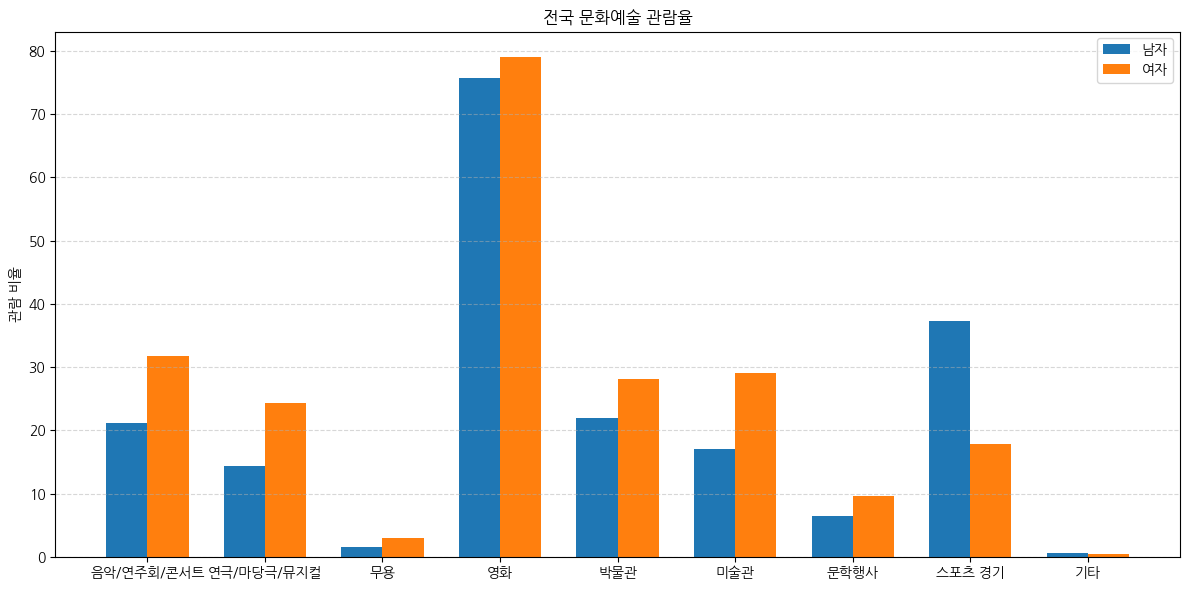

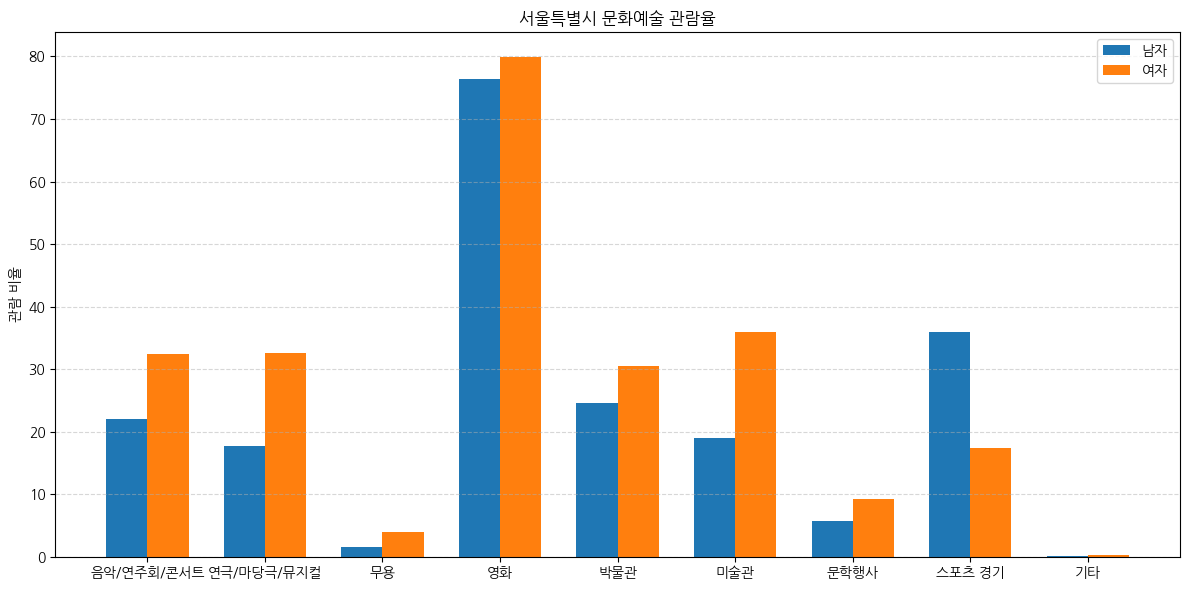

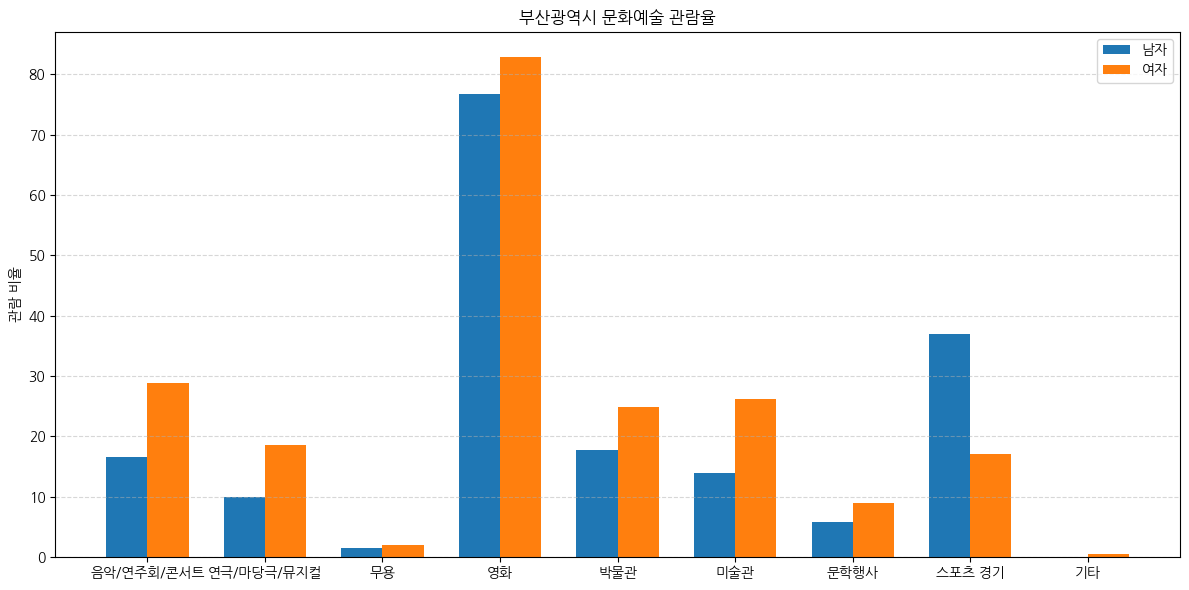

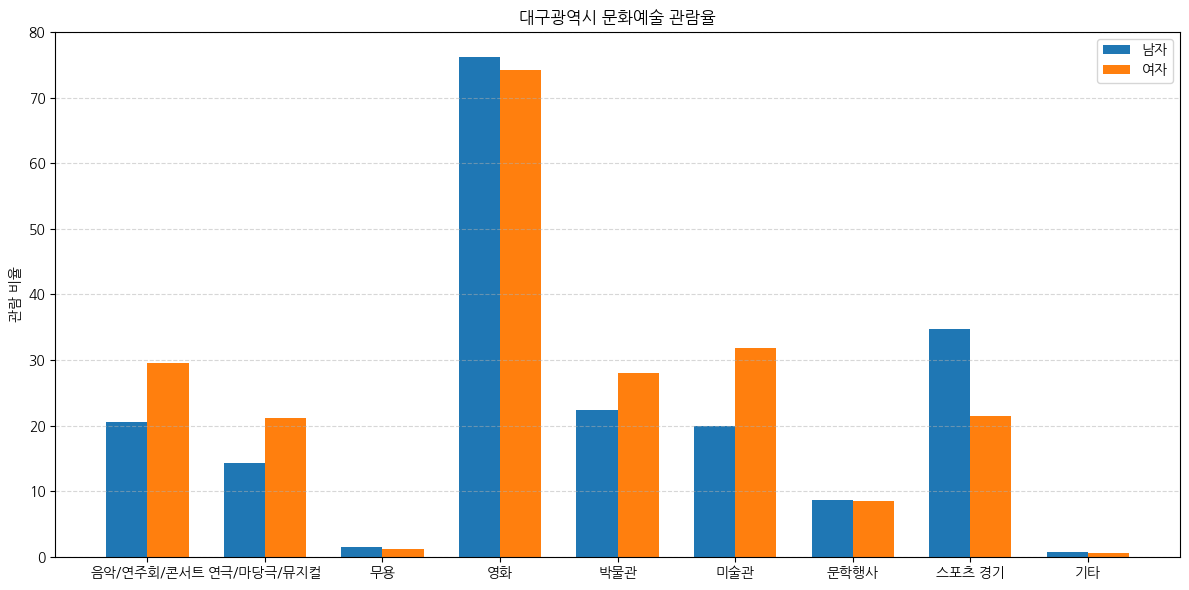

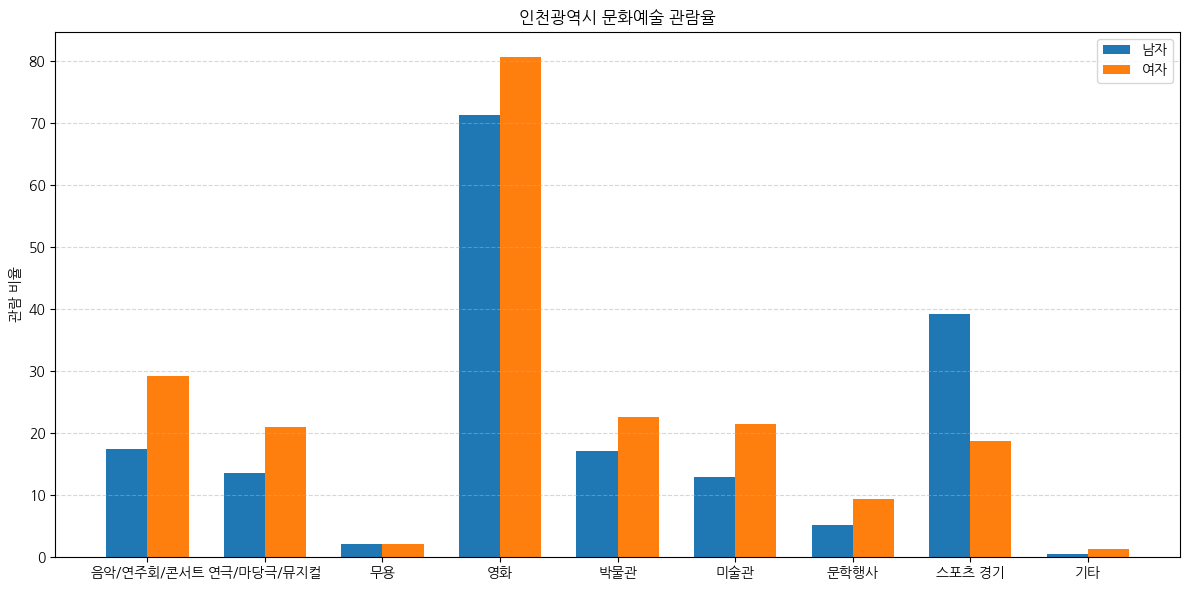

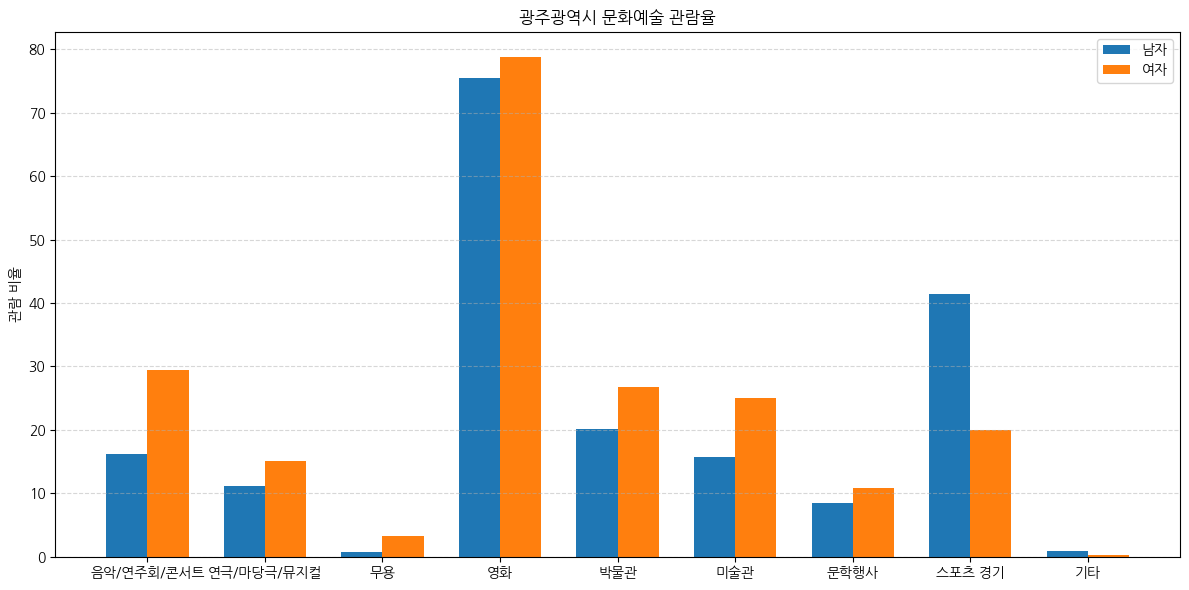

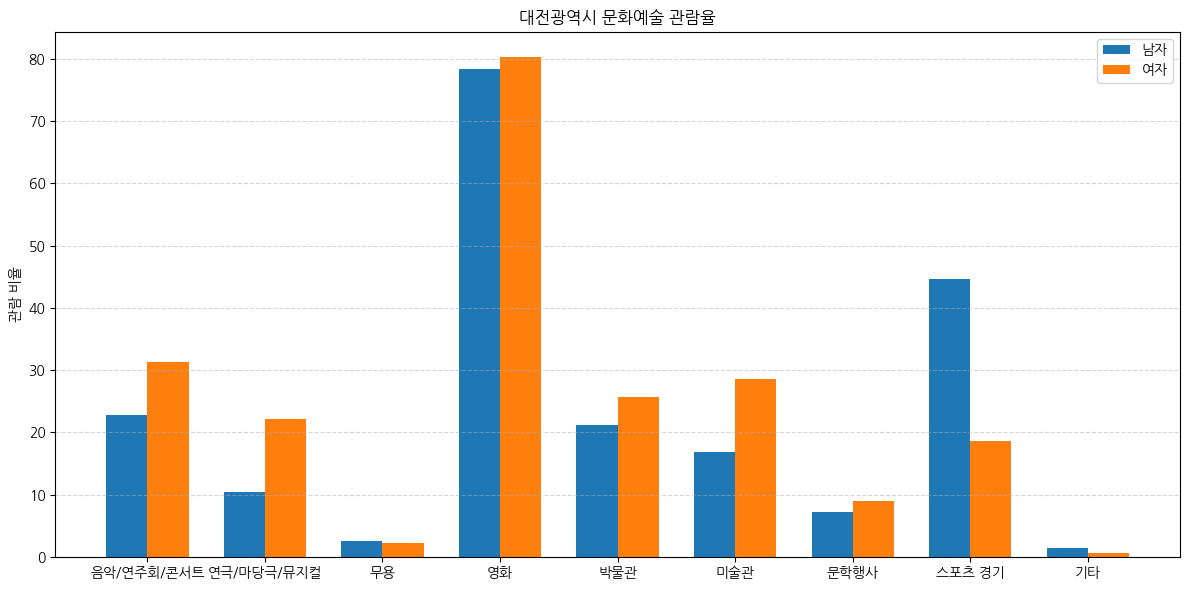

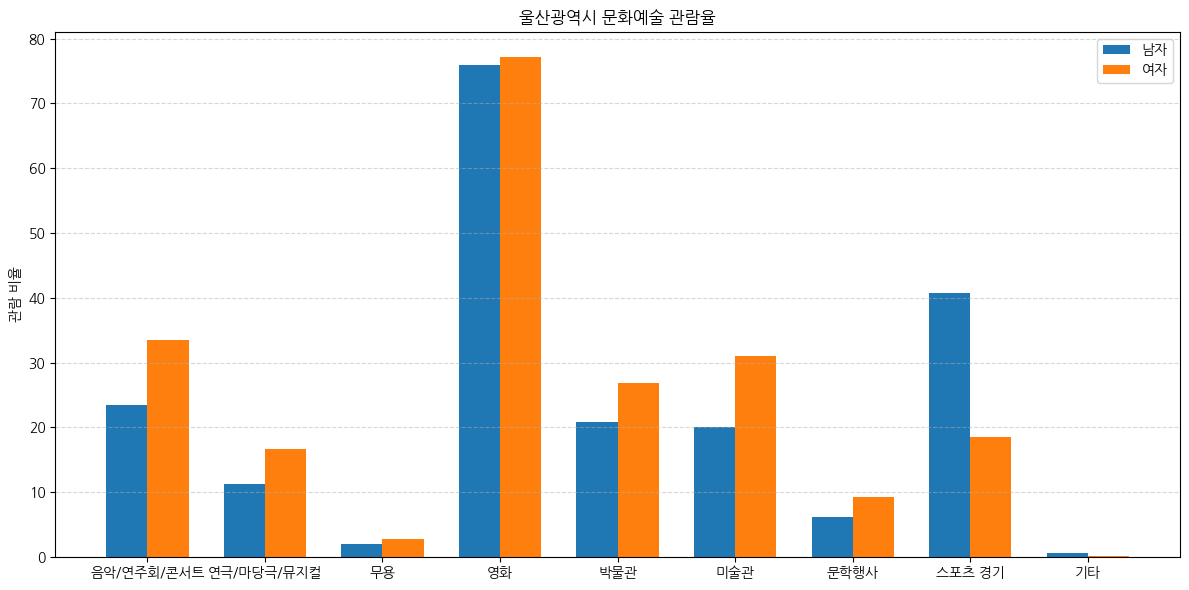

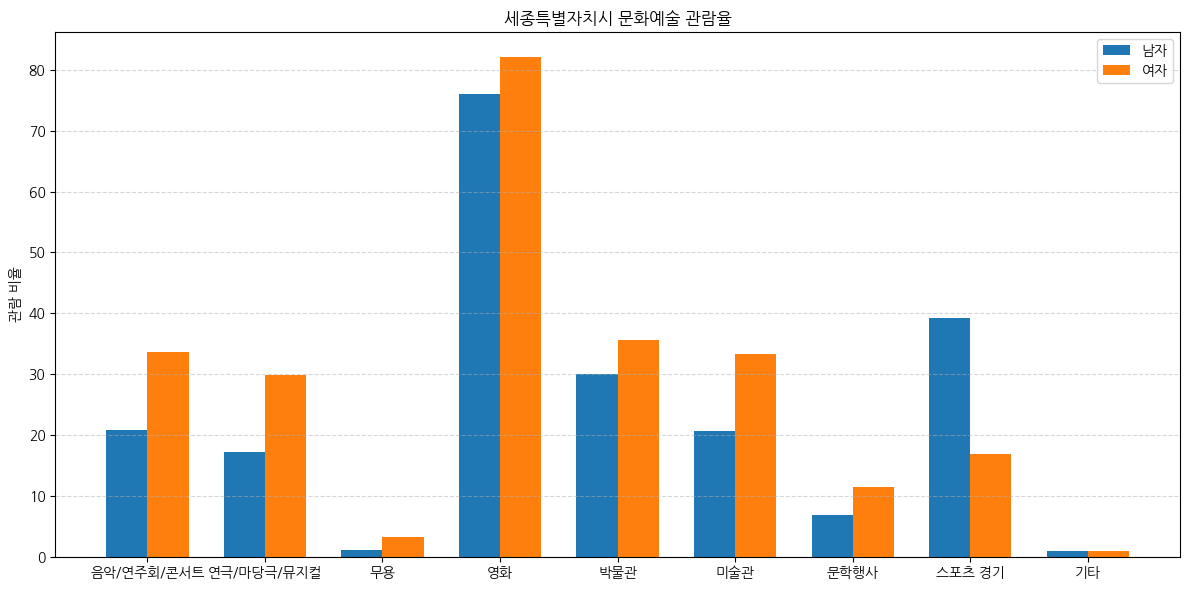

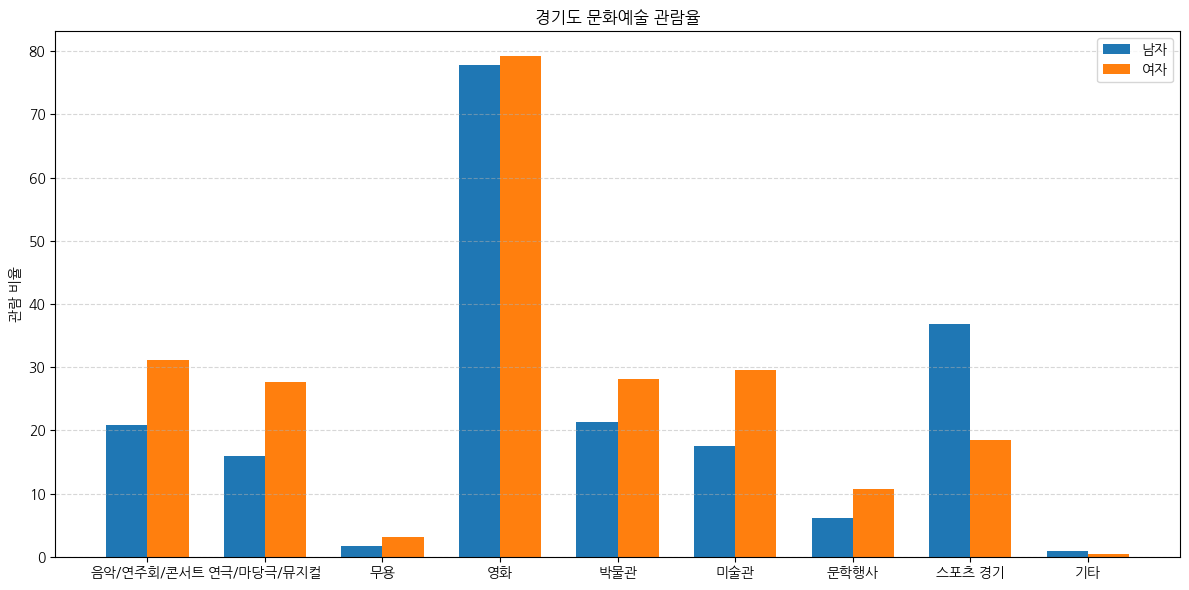

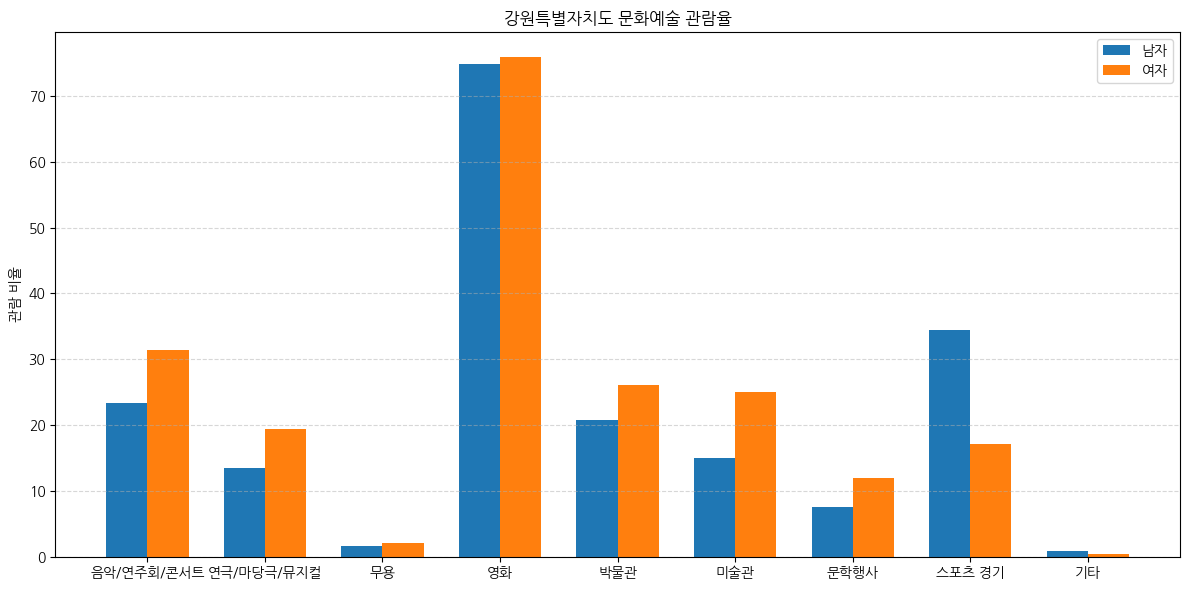

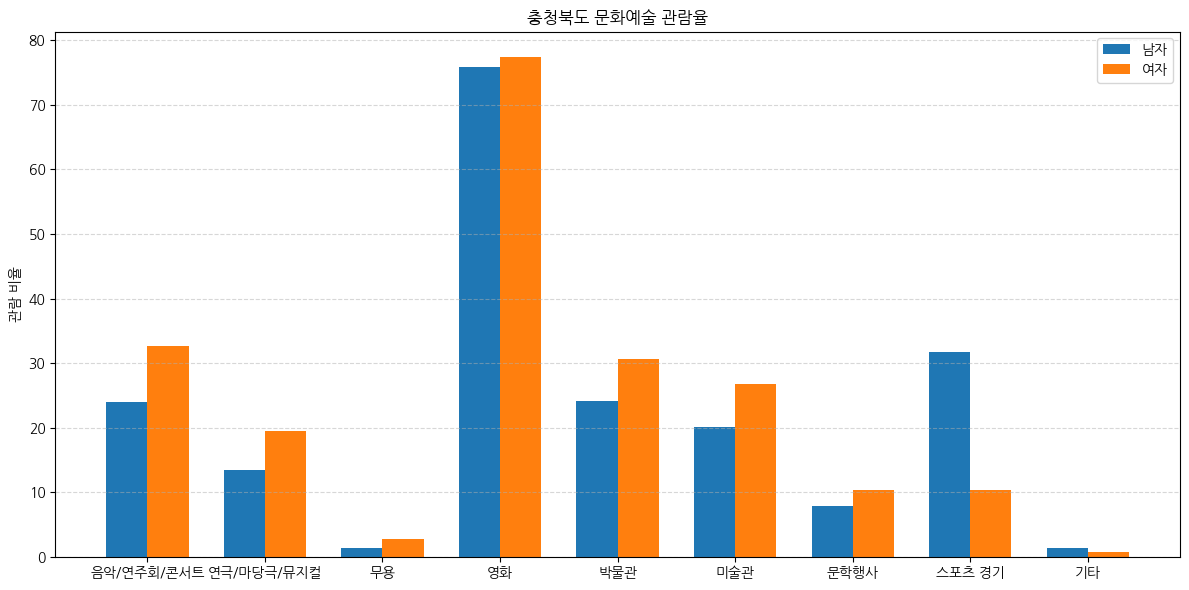

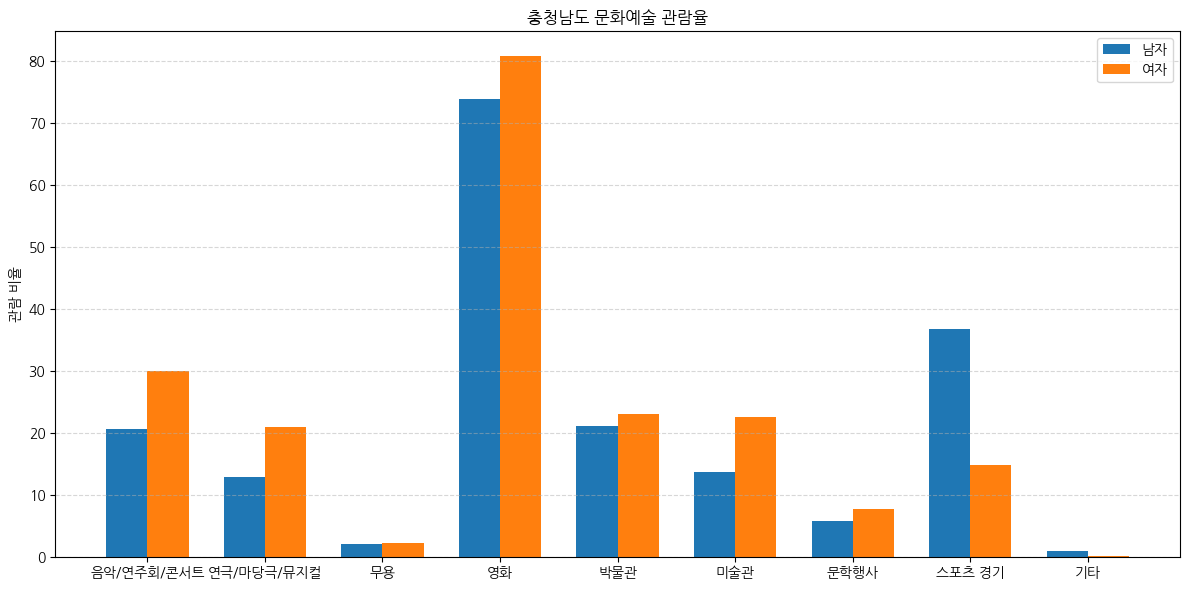

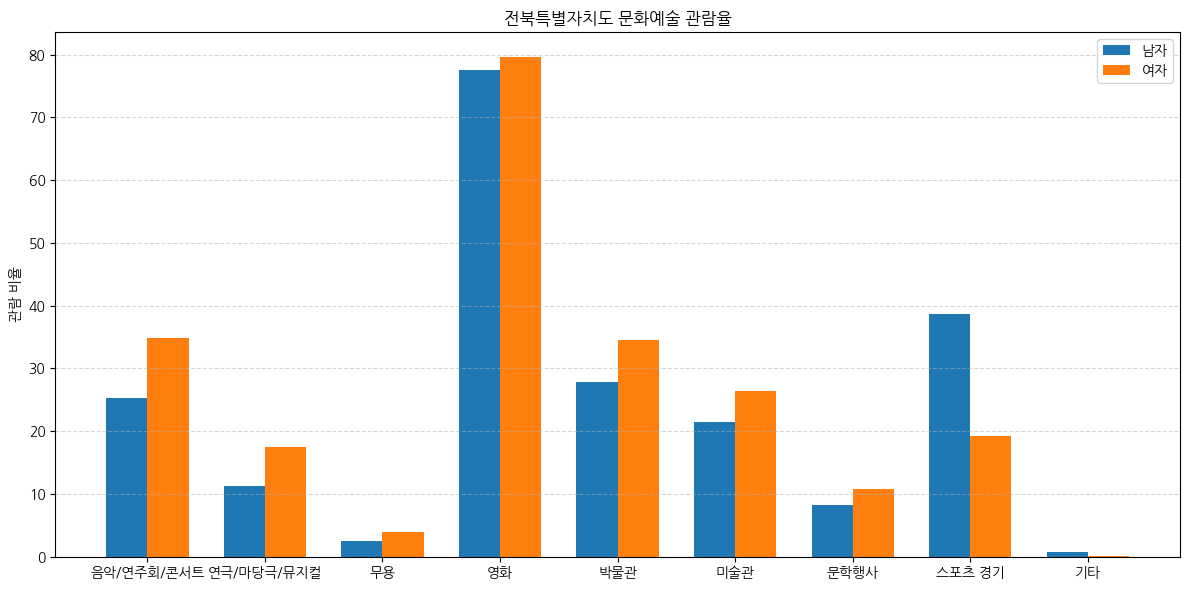

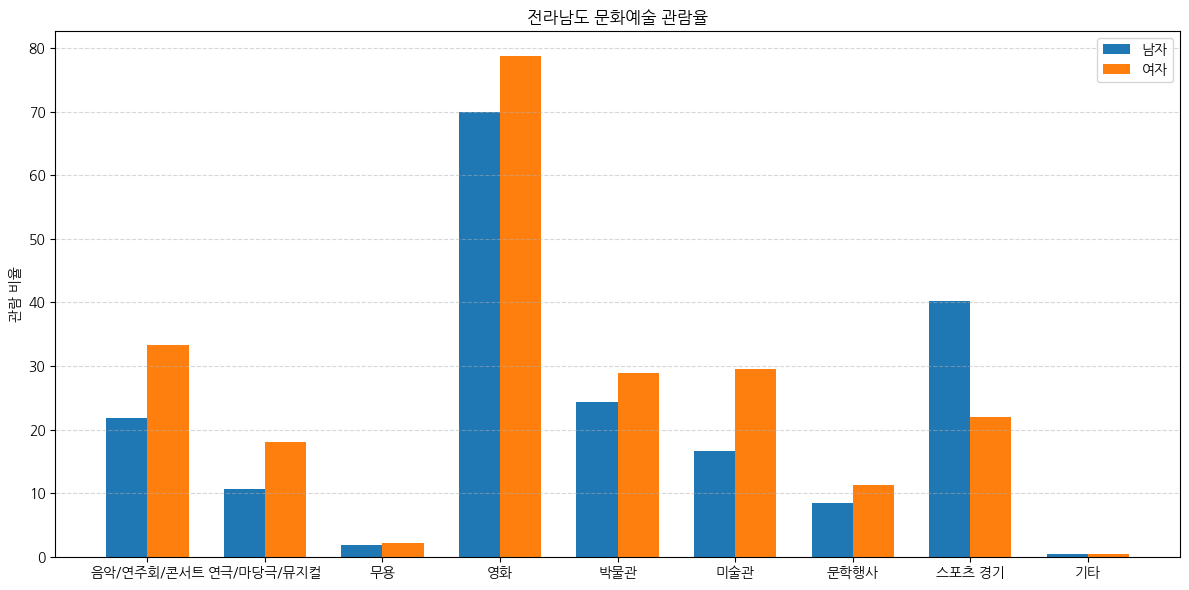

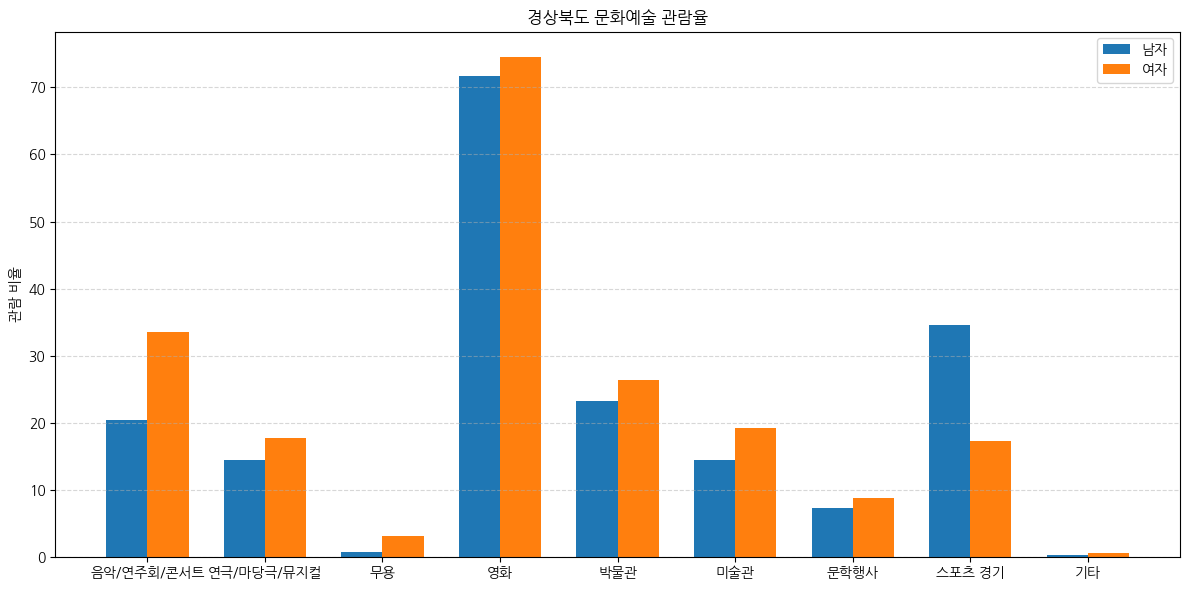

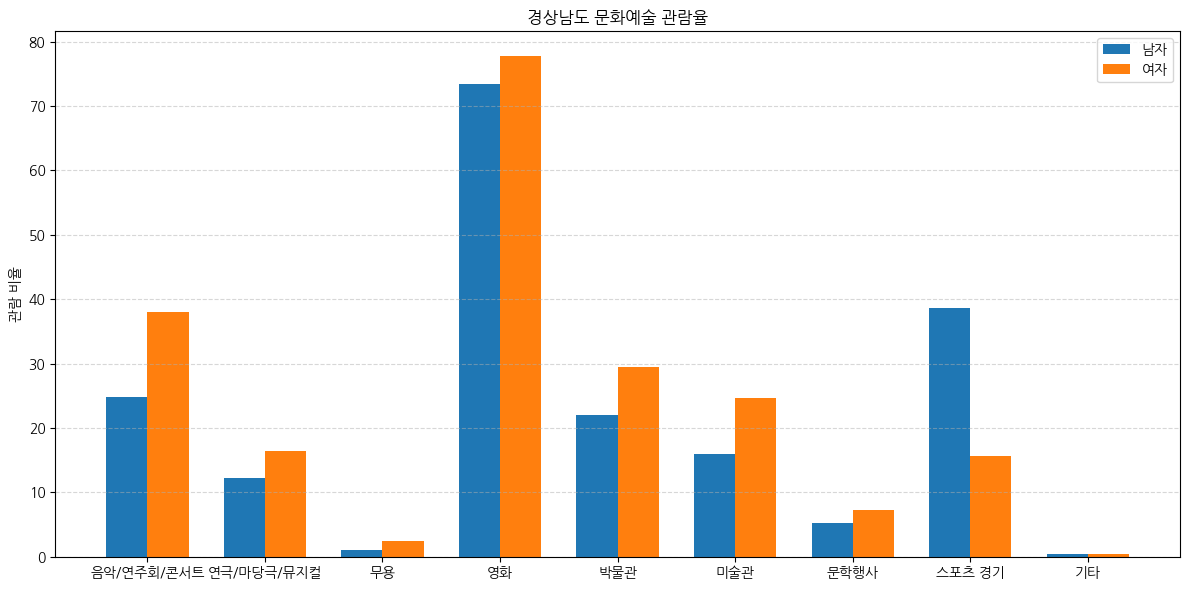

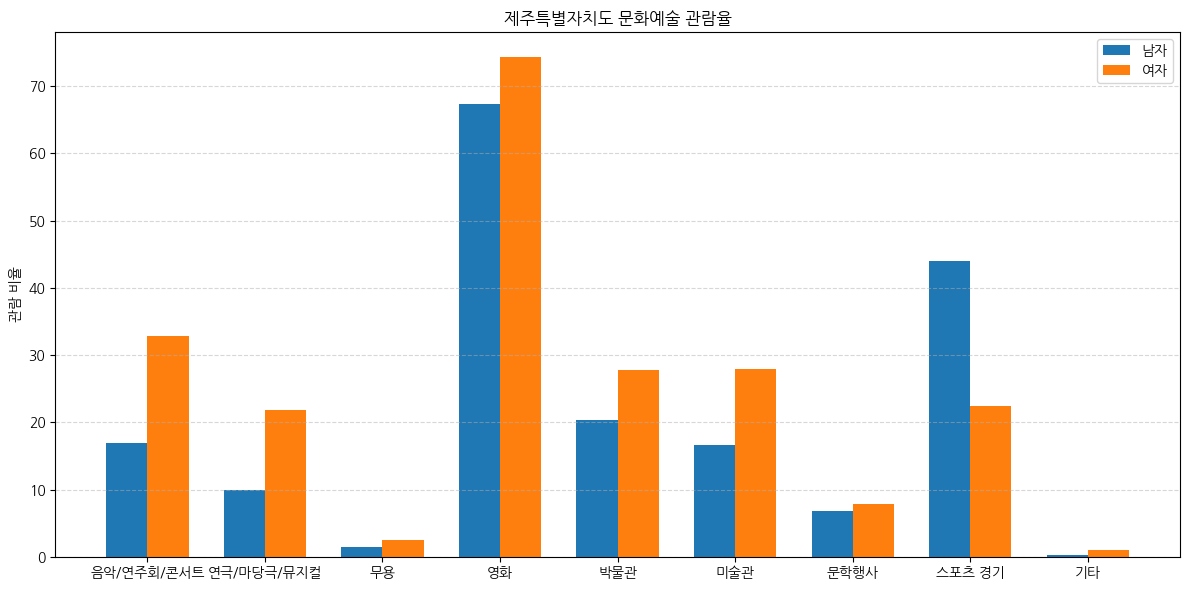

In [ ]:
labels = male_2023.index.unique()

for region in labels:
    if region not in male_2023.index or region not in female_2023.index:
        continue

    plt.figure(figsize=(12, 6))
    x = np.arange(len(male_2023.columns))
    bar_width = 0.35

    male_vals = pd.to_numeric(male_2023.loc[region], errors='coerce')
    female_vals = pd.to_numeric(female_2023.loc[region], errors='coerce')

    plt.bar(x - bar_width/2, male_vals, width=bar_width, label='남자')
    plt.bar(x + bar_width/2, female_vals, width=bar_width, label='여자')

    plt.xticks(x, male_2023.columns)
    plt.ylabel("관람 비율")
    plt.title(f"{region} 문화예술 관람율")
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

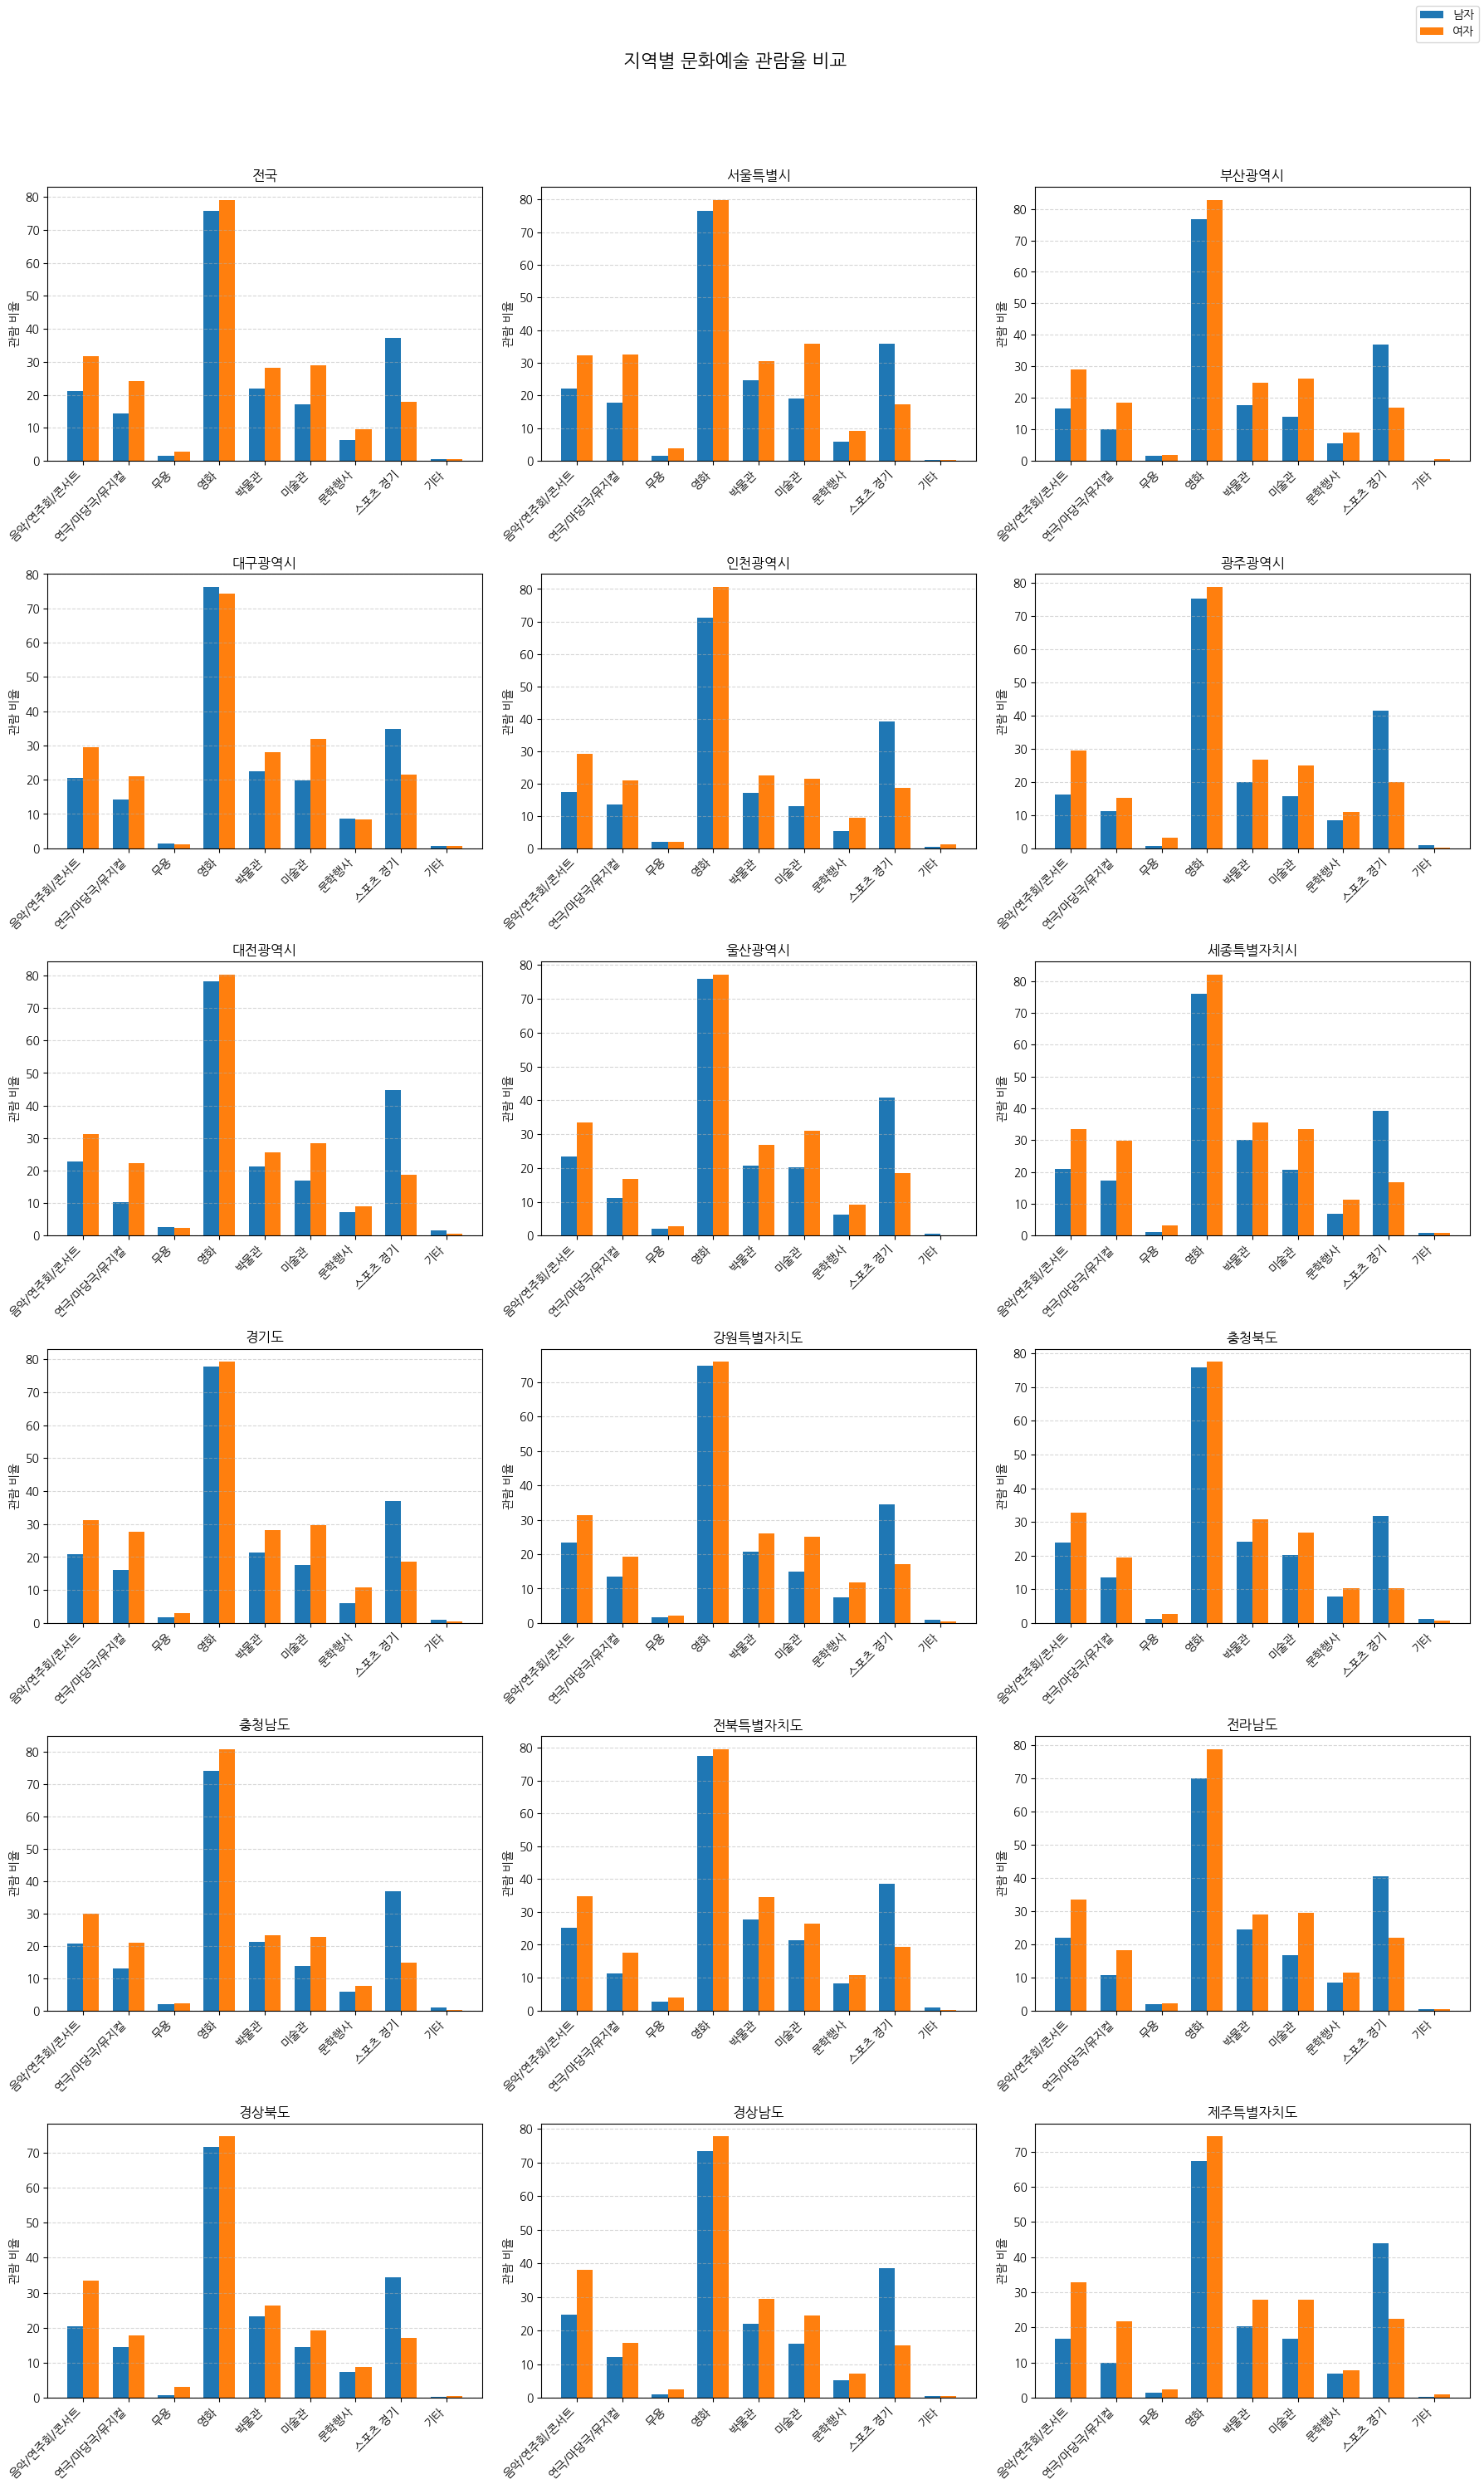

In [ ]:
regions = male_2023.index.unique()
fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(18, 30))
axes = axes.flatten()

bar_width = 0.35
x = np.arange(len(male_2023.columns))

for i, region in enumerate(regions):
    ax = axes[i]

    # 값 추출 및 숫자형 변환
    male_vals = pd.to_numeric(male_2023.loc[region], errors='coerce')
    female_vals = pd.to_numeric(female_2023.loc[region], errors='coerce')

    ax.bar(x - bar_width/2, male_vals, width=bar_width, label='남자')
    ax.bar(x + bar_width/2, female_vals, width=bar_width, label='여자')

    ax.set_title(region)
    ax.set_xticks(x)
    ax.set_xticklabels(male_2023.columns, rotation=45, ha='right')
    ax.set_ylabel("관람 비율")
    ax.grid(axis='y', linestyle='--', alpha=0.5)

fig.suptitle("지역별 문화예술 관람율 비교", fontsize=16)
fig.legend(['남자', '여자'], loc='upper right')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()